In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
data = pd.read_csv("insurancee.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [37]:
data.shape

(1338, 7)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
#Todos los objetos los calsifica y los cuenta 
d_types = dict(data.dtypes)
for name, type_ in d_types.items():
    if str(type_) == 'object':
        print(f"<========{name} ========>")
        print(data[name].value_counts())
        print()

<========sex ========>
sex
male      676
female    662
Name: count, dtype: int64

<========smoker ========>
smoker
no     1064
yes     274
Name: count, dtype: int64

<========region ========>
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



In [40]:
#Aqui se convierten esas columnas (smoker, sex y region) en enteros 
from sklearn.preprocessing import LabelEncoder

for name, type_ in d_types.items():
    if str(type_) == 'object':
        le = LabelEncoder()
        data[name] = le.fit_transform(data[name])

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


## PRIMER CAMBIO

In [42]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
part = onehotencoder.fit_transform(data['region'].values.reshape(-1,1)).toarray()

values= dict(data["region"].value_counts())

for e,(val, _) in enumerate(values.items()):
    data["region_" + str(val)] = part[:,e]

data= data.drop(["region"], axis = 1)

data.head()


,age,sex,bmi,children,smoker,expenses,region_2,region_3,region_1,region_0
0,19,0,27.9,0,1,16884.92,0.0,0.0,0.0,1.0
1,18,1,33.8,1,0,1725.55,0.0,0.0,1.0,0.0
2,28,1,33.0,3,0,4449.46,0.0,0.0,1.0,0.0
3,33,1,22.7,0,0,21984.47,0.0,1.0,0.0,0.0
4,32,1,28.9,0,0,3866.86,0.0,1.0,0.0,0.0


In [43]:
#se especifica que columnas se toman en cuenta, -1 significa que la ultima no 
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [44]:
x.shape , y.shape

((1338, 9), (1338,))

In [45]:
from sklearn.model_selection import train_test_split 

xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size = 0.2, random_state = 4) 

In [46]:
from sklearn.preprocessing import StandardScaler 

Scaler = StandardScaler()
xtrain = Scaler.fit_transform(xtrain)
xtest = Scaler.transform(xtest)


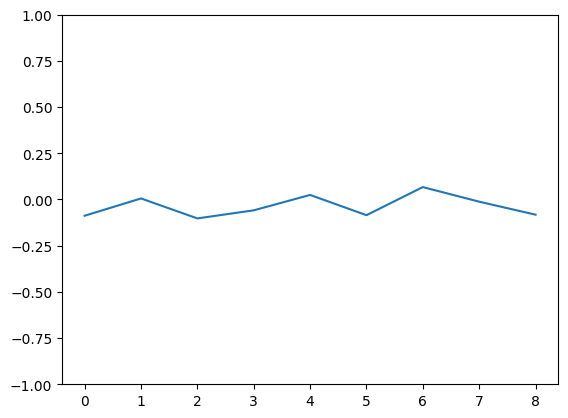

In [47]:
plt.ylim(-1,1)

means = []
for i in range(x.shape[1]):
    means.append(np.mean(xtest[:,i]))

plt.plot(means, scaley=False )

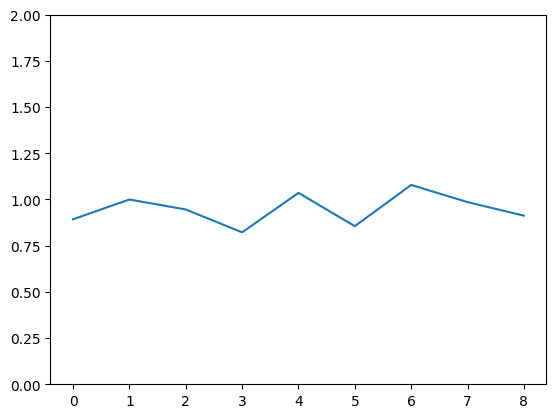

In [48]:

plt.ylim(0,2)

vars = []
for i in range(x.shape[1]):
    vars.append(np.var(xtest[:,i]))

plt.plot(vars)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

model = LinearRegression()
rfecv = RFECV(model, step = 1, min_features_to_select = 4 , n_jobs= -1)
rfecv.fit(xtrain, ytrain)


RFECV(estimator=LinearRegression(), min_features_to_select=4, n_jobs=-1)

In [50]:
rfecv.support_


array([False, False, False, False, False,  True,  True,  True,  True])

In [51]:
rfecv.ranking_

array([3, 4, 6, 2, 5, 1, 1, 1, 1])

In [52]:
selected_features = np.where(rfecv.support_)[0]
xtrain = xtrain[:,selected_features]
xtest = xtest[:,selected_features]

In [53]:
model.fit(xtrain, ytrain)

LinearRegression()

In [54]:
model.coef_

array([ 5.00434426e-17, -4.24900763e-01, -4.29448151e-01, -4.48723697e-01])

In [55]:
model.intercept_

0.2401869158878504

In [56]:
model.coef_.dot(xtest[10,:]) + model.intercept_

0.9999999999999996

In [61]:
model.predict(xtest[10,:].reshape(1,-1),)

array([1.])

In [62]:
model.score(xtest,ytest,)

1.0